# stretch_eicu (sepsis-pics)


## common


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from common_eicu import *


## patient data


In [5]:
df_patient = pd.read_csv(
    eicu_path('patient.csv.gz'),
)
df_patient.columns


Index(['patientunitstayid', 'patienthealthsystemstayid', 'gender', 'age',
       'ethnicity', 'hospitalid', 'wardid', 'apacheadmissiondx',
       'admissionheight', 'hospitaladmittime24', 'hospitaladmitoffset',
       'hospitaladmitsource', 'hospitaldischargeyear',
       'hospitaldischargetime24', 'hospitaldischargeoffset',
       'hospitaldischargelocation', 'hospitaldischargestatus', 'unittype',
       'unitadmittime24', 'unitadmitsource', 'unitvisitnumber', 'unitstaytype',
       'admissionweight', 'dischargeweight', 'unitdischargetime24',
       'unitdischargeoffset', 'unitdischargelocation', 'unitdischargestatus',
       'uniquepid'],
      dtype='object')

In [6]:
df_patient['gender'].unique()


array(['Female', 'Male', nan, 'Unknown', 'Other'], dtype=object)

## diagnosis data


In [3]:
df_sepsis = pd.read_csv(
    './data/sepsis_eicu.csv.gz',
)
df_sepsis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115375 entries, 0 to 115374
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   patientunitstayid  115375 non-null  int64 
 1   diagnosisstring    115375 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [5]:
df_sepsis[KEY_DIAGNOSIS_STRING].unique()

array(['cardiovascular|shock / hypotension|sepsis',
       'cardiovascular|shock / hypotension|signs and symptoms of sepsis (SIRS)',
       'infectious diseases|systemic/other infections|sepsis',
       'infectious diseases|systemic/other infections|signs and symptoms of sepsis (SIRS)',
       'cardiovascular|shock / hypotension|signs and symptoms of sepsis (SIRS)|due to infectious process with organ dysfunction',
       'cardiovascular|shock / hypotension|sepsis|sepsis with single organ dysfunction- acute renal failure',
       'cardiovascular|shock / hypotension|sepsis|severe',
       'cardiovascular|shock / hypotension|signs and symptoms of sepsis (SIRS)|due to infectious process without organ dysfunction',
       'cardiovascular|shock / hypotension|sepsis|sepsis with single organ dysfunction- acute respiratory failure',
       'cardiovascular|shock / hypotension|sepsis|sepsis with multi-organ dysfunction',
       'renal|disorder of kidney|acute renal failure|due to sepsis',
       

## treatment data


In [18]:
df_treatment = pd.read_csv(
    TREATMENT_PATH,
    nrows=5000,
)
df_treatment.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   treatmentid          5000 non-null   int64 
 1   patientunitstayid    5000 non-null   int64 
 2   treatmentoffset      5000 non-null   int64 
 3   treatmentstring      5000 non-null   object
 4   activeupondischarge  5000 non-null   bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 161.3+ KB


In [6]:
df_treatment[
    (df_treatment['patientunitstayid'] == 242290)
    & (
        df_treatment['treatmentstring'].map(
            lambda s: 'vasopressor' in s
        )
    )
]


,treatmentid,patientunitstayid,treatmentoffset,treatmentstring,activeupondischarge
245,8645242,242290,162,cardiovascular|shock|vasopressors|norepinephri...,False
253,10019133,242290,165,cardiovascular|shock|vasopressors|norepinephri...,True


In [23]:
with open('./data/treatment_strings.txt', 'w') as output_file:
    for string in df_treatment[KEY_TREATMENT_STRING].unique():
        output_file.write(string)
        output_file.write('\n')


## exam data


In [31]:
df_exam = pd.read_csv(
    # './data/exam_eicu_filtered.csv.gz',
    EXAM_PATH,
    nrows=50000,
)
df_exam.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   physicalexamid      50000 non-null  int64 
 1   patientunitstayid   50000 non-null  int64 
 2   physicalexamoffset  50000 non-null  int64 
 3   physicalexampath    50000 non-null  object
 4   physicalexamvalue   50000 non-null  object
 5   physicalexamtext    50000 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.3+ MB


In [17]:
# df = df_exam[df_exam['physicalexamvalue'] == 'HR Current']
# df = df[['patientunitstayid', 'physicalexamoffset']]
# df.groupby('patientunitstayid').count()['physicalexamoffset'].unique()
df_exam[
    (
        df_exam['physicalexamvalue'].map(
            lambda s: 'bp' in s.lower()
        )
    )
    # & (df_exam['patientunitstayid'] == 208303)
].head(10)


,patientunitstayid,physicalexamoffset,physicalexamvalue,physicalexamtext
1,149700,0,BP (systolic) Current,133.0
2,149700,0,BP (diastolic) Current,61.0
4,208303,0,BP (systolic) Current,133.0
5,208303,0,BP (diastolic) Current,30.0
6,167766,0,BP (systolic) Current,78.0
7,167766,0,BP (diastolic) Current,52.0
8,146410,0,BP (systolic) Current,167.0
9,146410,0,BP (diastolic) Current,79.0
11,223813,0,BP (systolic) Current,158.0
12,223813,0,BP (diastolic) Current,52.0


In [32]:
with open('./data/exam_names.txt', 'w') as output_file:
    for name in df_exam[KEY_EXAM_NAME].unique():
        output_file.write(name)
        output_file.write('\n')


## lab data


In [29]:
df_lab = pd.read_csv(
    LAB_PATH,
    nrows=50000,
)


In [15]:
# df_lab[df_lab['patientunitstayid'] == 242505][['patientunitstayid','labname']] \
#     .groupby('labname').count()
# df_lab[
#     (df_lab['patientunitstayid'] == 242505)
#     & (df_lab['labname'].isin(['albumin', '-lymphs']))
# ].sort_values(by='labresultoffset')
# df_lab[
#     df_lab['labname'].map(
#         lambda s: 'wbc' in s.lower()
#     )
# ]['labname'].unique()
df_lab[df_lab['labname'] == 'WBC x 1000'].head()


,labid,patientunitstayid,labresultoffset,labtypeid,labname,labresult,labresulttext,labmeasurenamesystem,labmeasurenameinterface,labresultrevisedoffset
52,54358175,141168,2026,3,WBC x 1000,19.8,19.8,K/mcL,K/mcL,2148
118,56155662,141168,516,3,WBC x 1000,9.8,9.8,K/mcL,K/mcL,524
135,53275575,141168,1133,3,WBC x 1000,14.7,14.7,K/mcL,K/mcL,1196
148,53200536,141178,-280,3,WBC x 1000,7.6,7.6,K/mcL,K/mcL,-216
173,55330219,141179,1487,3,WBC x 1000,8.1,8.1,K/mcL,K/mcL,1546


In [30]:
with open('./data/lab_names.txt', 'w') as output_file:
    for name in df_lab[KEY_LAB_NAME].unique():
        output_file.write(name)
        output_file.write('\n')


## aperiodic


In [22]:
df_aperiodic = pd.read_csv(
    eicu_path('vitalAperiodic.csv.gz'),
    nrows=10000,
)
df_aperiodic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vitalaperiodicid      10000 non-null  int64  
 1   patientunitstayid     10000 non-null  int64  
 2   observationoffset     10000 non-null  int64  
 3   noninvasivesystolic   9971 non-null   float64
 4   noninvasivediastolic  9971 non-null   float64
 5   noninvasivemean       9999 non-null   float64
 6   paop                  1 non-null      float64
 7   cardiacoutput         0 non-null      float64
 8   cardiacinput          0 non-null      float64
 9   svr                   0 non-null      float64
 10  svri                  0 non-null      float64
 11  pvr                   0 non-null      float64
 12  pvri                  0 non-null      float64
dtypes: float64(10), int64(3)
memory usage: 1015.8 KB


In [15]:
len(df_aperiodic[KEY_IDENTITY].unique())


133

## extracted data (full)


In [12]:
df_full = pd.read_csv('./data/data_eicu_full.csv.gz')
df_full.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111511 entries, 0 to 111510
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   gender       111511 non-null  float64
 1   age          111511 non-null  float64
 2   vasopressor  111511 non-null  float64
 3   urine        111511 non-null  float64
 4   creatinine   111511 non-null  float64
 5   platelet     111511 non-null  float64
 6   inr          111511 non-null  float64
 7   pt           111511 non-null  float64
 8   ptt          111511 non-null  float64
 9   lactate      111511 non-null  float64
 10  rdw          111511 non-null  float64
 11  bilirubin    111511 non-null  float64
 12  bicarbonate  111511 non-null  float64
 13  crp          111511 non-null  float64
 14  lymph        111511 non-null  float64
 15  albumin      111511 non-null  float64
 16  prealbumin   111511 non-null  float64
 17  wbc          111511 non-null  float64
 18  bp           111511 non-

In [13]:
df_full['vasopressor'].value_counts()


0.0    74298
1.0    37213
Name: vasopressor, dtype: int64

In [14]:
df_full[(df_full < 0).any(axis='columns')]


,gender,age,vasopressor,urine,creatinine,platelet,inr,pt,ptt,lactate,...,bicarbonate,crp,lymph,albumin,prealbumin,wbc,bp,hr,bmi,flag


In [15]:
positive_count = len(
    df_full.query(f'flag == {FLAG_POSITIVE:d}')
)
total_count = len(df_full)
positive_rate = positive_count / total_count
print(f'positive rate: {positive_rate:.2%}')


positive rate: 3.77%


<AxesSubplot:>

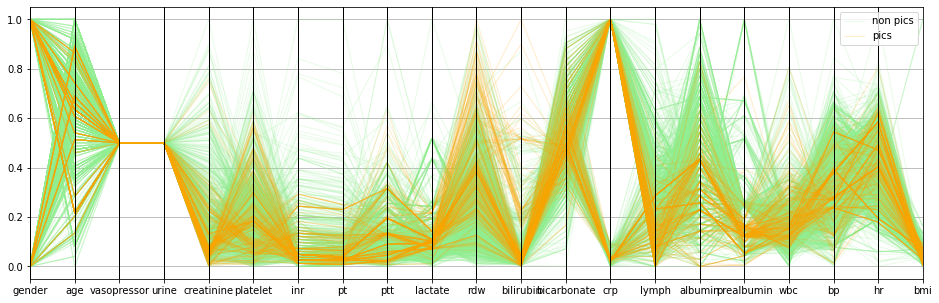

In [17]:
df_visualize = df_full.iloc[:2000, :].copy()

# map labels
df_visualize[KEY_FLAG] = df_visualize[KEY_FLAG].map(
    lambda v: 'pics' if v else 'non pics'
)

# map data to [0, 1]
for col in df_visualize.columns[:-1]:
    maximum = df_visualize[col].max()
    minimum = df_visualize[col].min()
    delta = maximum - minimum
    if delta == 0:
        df_visualize[col] = 0.5
    else:
        df_visualize[col] = (df_visualize[col] - minimum) / delta

# visualize input data
fig_visualize = plt.figure(figsize=(16, 5))
ax_visualize = fig_visualize.add_subplot()
pd.plotting.parallel_coordinates(
    df_visualize.sort_values(by=KEY_FLAG),
    KEY_FLAG,
    color=['lightgreen', 'orange'],
    alpha=0.2,
    lw=1,
    ax=ax_visualize,
)
